In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
from datetime import datetime
import requests

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
from citipy import citipy

In [21]:
# Create a list for holding the cities.
cities = []
# Identify thenearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm the sufficient count
len(cities)

628

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [31]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

# Create Counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | vao
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | san rafael
Processing Record 9 of Set 1 | rindal
Processing Record 10 of Set 1 | breyten
Processing Record 11 of Set 1 | sioux lookout
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | udgir
Processing Record 14 of Set 1 | ulladulla
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | lasa
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | kununurra
Processing Record 21 of Set 1 | cabo san lucas
Processing Reco

Processing Record 34 of Set 4 | klyuchi
Processing Record 35 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 36 of Set 4 | berdsk
Processing Record 37 of Set 4 | kahului
Processing Record 38 of Set 4 | rocha
Processing Record 39 of Set 4 | touros
Processing Record 40 of Set 4 | katangli
Processing Record 41 of Set 4 | bandarbeyla
Processing Record 42 of Set 4 | ovalle
Processing Record 43 of Set 4 | noumea
Processing Record 44 of Set 4 | sexsmith
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | mogadishu
Processing Record 47 of Set 4 | batemans bay
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | nelson bay
Processing Record 1 of Set 5 | mersing
Processing Record 2 of Set 5 | ormara
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | samarai
Processing Record 5 of Set 5 | mao
Processing Record 6 of Set 5 | pilot butte
Processing Record 7 of Set 5 | bodden town
Proces

Processing Record 23 of Set 8 | ambon
Processing Record 24 of Set 8 | balkhash
Processing Record 25 of Set 8 | malanje
Processing Record 26 of Set 8 | ottawa
Processing Record 27 of Set 8 | santa rosa
Processing Record 28 of Set 8 | enkoping
Processing Record 29 of Set 8 | tinaquillo
Processing Record 30 of Set 8 | san jose
Processing Record 31 of Set 8 | nguiu
City not found. Skipping...
Processing Record 32 of Set 8 | akdepe
Processing Record 33 of Set 8 | warwick
Processing Record 34 of Set 8 | bongandanga
Processing Record 35 of Set 8 | enid
Processing Record 36 of Set 8 | ferrol
Processing Record 37 of Set 8 | la ronge
Processing Record 38 of Set 8 | mattawa
Processing Record 39 of Set 8 | tazmalt
Processing Record 40 of Set 8 | isla mujeres
Processing Record 41 of Set 8 | ponta do sol
Processing Record 42 of Set 8 | livny
Processing Record 43 of Set 8 | kyra
Processing Record 44 of Set 8 | kirakira
Processing Record 45 of Set 8 | abu dhabi
Processing Record 46 of Set 8 | esterhaz

Processing Record 12 of Set 12 | hobyo
Processing Record 13 of Set 12 | yangjiang
Processing Record 14 of Set 12 | duyun
Processing Record 15 of Set 12 | wukari
Processing Record 16 of Set 12 | puerto escondido
Processing Record 17 of Set 12 | tapes
Processing Record 18 of Set 12 | daxian
City not found. Skipping...
Processing Record 19 of Set 12 | langenau
Processing Record 20 of Set 12 | aklavik
Processing Record 21 of Set 12 | paamiut
Processing Record 22 of Set 12 | tonj
Processing Record 23 of Set 12 | krasnoselkup
Processing Record 24 of Set 12 | bonthe
Processing Record 25 of Set 12 | taldan
Processing Record 26 of Set 12 | kindu
Processing Record 27 of Set 12 | riyadh
Processing Record 28 of Set 12 | clarence town
Processing Record 29 of Set 12 | uray
Processing Record 30 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 31 of Set 12 | ha tinh
Processing Record 32 of Set 12 | novoagansk
Processing Record 33 of Set 12 | suluova
Processing Record 34 of Set 12

In [40]:
# Convert th array of dictionaries to a Pandas dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,54.00,69,100,9.51,US,2021-04-15 18:23:42
1,Vao,-22.6667,167.4833,75.20,82,100,18.63,NC,2021-04-15 18:27:05
2,Busselton,-33.6500,115.3333,57.00,95,37,9.33,AU,2021-04-15 18:27:05
3,Avarua,-21.2078,-159.7750,78.80,83,75,8.05,CK,2021-04-15 18:26:00
4,Kapaa,22.0752,-159.3190,71.60,78,75,12.66,US,2021-04-15 18:22:56
5,San Rafael,-34.6177,-68.3301,75.34,26,0,7.18,AR,2021-04-15 18:27:05
6,Rindal,63.0565,9.2124,37.29,80,58,2.26,NO,2021-04-15 18:27:06
7,Breyten,-26.3018,29.9870,65.21,48,70,9.46,ZA,2021-04-15 18:27:06
8,Sioux Lookout,50.1001,-91.9170,39.20,56,20,9.22,CA,2021-04-15 18:27:07
9,Ushuaia,-54.8000,-68.3000,53.60,35,40,14.97,AR,2021-04-15 18:26:34


In [41]:
# reorder columns in DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-04-15 18:23:42,42.6001,-73.9662,54.00,69,100,9.51
1,Vao,NC,2021-04-15 18:27:05,-22.6667,167.4833,75.20,82,100,18.63
2,Busselton,AU,2021-04-15 18:27:05,-33.6500,115.3333,57.00,95,37,9.33
3,Avarua,CK,2021-04-15 18:26:00,-21.2078,-159.7750,78.80,83,75,8.05
4,Kapaa,US,2021-04-15 18:22:56,22.0752,-159.3190,71.60,78,75,12.66
5,San Rafael,AR,2021-04-15 18:27:05,-34.6177,-68.3301,75.34,26,0,7.18
6,Rindal,NO,2021-04-15 18:27:06,63.0565,9.2124,37.29,80,58,2.26
7,Breyten,ZA,2021-04-15 18:27:06,-26.3018,29.9870,65.21,48,70,9.46
8,Sioux Lookout,CA,2021-04-15 18:27:07,50.1001,-91.9170,39.20,56,20,9.22
9,Ushuaia,AR,2021-04-15 18:26:34,-54.8000,-68.3000,53.60,35,40,14.97


In [42]:
# Create the ouput file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")  #also changes inex column to City_ID instead of blank

In [43]:
# Extract relevant fileds fromt he DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

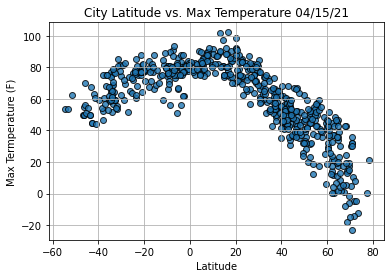

In [50]:
# Import time module
import time

# Build the scatter plot for latitude and max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Termperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

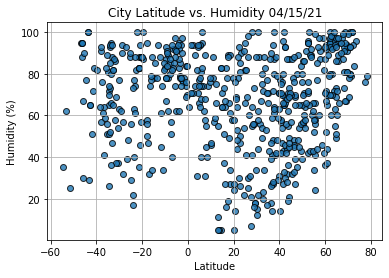

In [51]:
# Build the scatter plot for latitude and humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

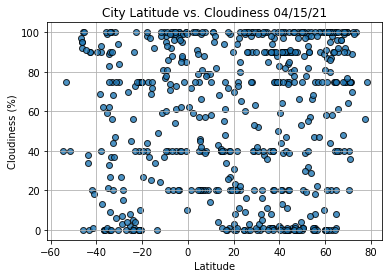

In [55]:
# Build the scatter plot for latitude and cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

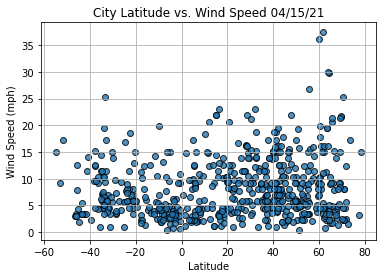

In [54]:
# Build the scatter plot for latitude and wind_speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()